In [1]:
import pandas as pd
import shap
import matplotlib.pyplot as plt 
import numpy as np
# 读取player 的数据
player = pd.read_csv("../datafrom200/players.csv")
# x_list = player.columns[7:-5]
# x_list = ['Crossing', 'Finishing', 'Heading_Accuracy', 'Short_Passing', 'Volleys',
#        'Dribbling', 'Curve', 'FK_Accuracy', 'Long_Passing', 'Ball_Control',
#        'Acceleration', 'Sprint_Speed', 'Agility' , 'Balance',
#        'Shot_Power', 'Jumping', 'Stamina', 'Strength', 'Long_Shots',
#        'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
#        'Composure', 'Defensive_Awareness']
x_list = ['Finishing', 'Short_Passing', 'Dribbling', 'Long_Passing',
       'Ball_Control', 'Acceleration', 'Sprint_Speed', 
       'Reactions', 
       'Balance',
       'Shot_Power', 'Stamina', 'Strength', 'Aggression', 'Vision',
       'Penalties', 'Standing_Tackle', 'Sliding_Tackle'] 
X = player[x_list]
y = player["value"]


In [2]:
boundry = 0.25*10**8
X = X[y < boundry]
player = player[y < boundry]
y = y[y < boundry]

y_original = y
len(X)

9842

In [3]:
from scipy import stats
from scipy.special import inv_boxcox

# Apply Box-Cox transformation
transformed_data, lambda_value = stats.boxcox(y)

print("Transformed data:", transformed_data)
print("Lambda value:", lambda_value)
y = transformed_data

Transformed data: [7.85664747 7.78820172 7.41020359 ... 7.48835538 7.75393443 7.84449768]
Lambda value: -0.09565905050311828


In [4]:
from sklearn.model_selection import train_test_split
# 划分训练集 train, test : 0.8, 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [5]:
from sklearn.ensemble import GradientBoostingRegressor

gbdt = GradientBoostingRegressor(n_estimators=800, learning_rate=0.1, max_depth=5).fit(X, y)
print(gbdt.score(X_test, y_test))

explainer_gbdt = shap.Explainer(gbdt, X_test)
shap_values_gbdt = explainer_gbdt(X)

0.9852629778565931


100%|===================| 9810/9842 [02:45<00:00]        

In [6]:

# print(inv_boxcox(transformed_data, lambda_value)[1600])
# print(y_original[1600])
# print(len(y_original), len(inv_boxcox(transformed_data, lambda_value)))
# prediction_gbdt = inv_boxcox(gbdt.predict(X), lambda_value)
# plt.scatter(y_original, prediction_gbdt)

# plt.scatter(y, gbdt.predict(X))

's predicted value is 3417656.241975253 euros
's real value is 3500000.0 euros


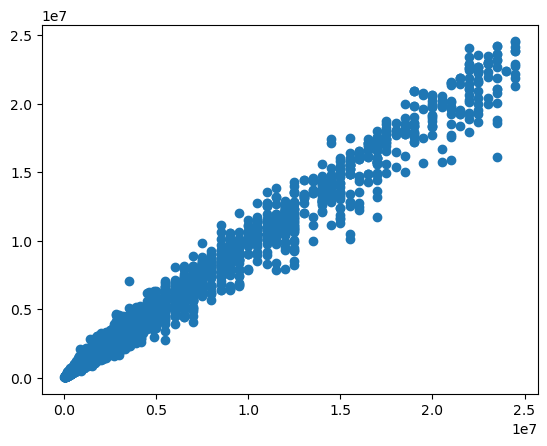

In [7]:
y_original = np.array(y_original)
prediction = gbdt.predict(X)
inv_prediction = inv_boxcox(prediction, lambda_value)
plt.scatter(y_original, inv_prediction)

row = 1600

print("'s predicted value is", inv_prediction[row], "euros")
print("'s real value is", y_original[row], "euros")

# fig = plt.figure(dpi=600)
# plt.title("Estimated value vs. real value")
# plt.scatter(y_original, inv_prediction)
# plt.xlabel("Real value")
# plt.ylabel("Estimated value")
# plt.savefig("../result/estimated_value_vs_real_value.pdf")

# fig = plt.figure(dpi=300)
# plt.title("Estimated transformed data vs. real transformed data")
# plt.scatter(transformed_data, prediction)
# plt.xlabel("Real transformed data")
# plt.ylabel("Estimated transformed data")
# plt.savefig("../result/estimated_transformed_data_vs_real_transformed_data.pdf")

In [8]:
name_list = []
for name_str in name_list:
    mask = player["name"].str.contains(name_str)
    row = player[mask].index[0]
    # print(row, player.iloc[row])
    plt.figure(dpi=300)
    values = explainer_gbdt.shap_values(X.iloc[row])
    shap.force_plot(explainer_gbdt.expected_value, values, X.iloc[row], matplotlib=True, show=False)
    # plt.title("the explaining individual predictions of " + name_str)
    # fig.tight_layout()
    # plt.savefig("../result/shap_value_local/{name}_gbdt.pdf".format(name=name_str))
    plt.savefig("/mnt/d/桌面/英文文章标准档案/4_Figure/final_version/shap_value_local/{name}_gbdt.pdf".format(name=name_str))

    
    print("'s predicted value is", inv_prediction[row], "euros")
    print("'s real value is", y_original[row], "euros")

    # print(name_str, "'s predicted value is", gbdt.predict(np.array(X.iloc[row]).reshape(1, -1))[0])
    # print(name_str, "'s real value is", y[row])
    # fig = plt.figure()
    # shap.plots.waterfall(shap_values_cbt[row])
    # plt.title("the explaining individual predictions of " + name_str)
    # fig.tight_layout()
    # fig.savefig("../result/shap_value_local/{name}_cbt.pdf".format(name=name_str))

In [12]:
# "三笘 薫", "鎌田 大地"
# row = 行数 - 2
# row： 9706 - 2， 2827 - 2
search_list = [("三笘 薫", 9704)
            #    , ("鎌田 大地", 2825)
               ]
for name_str, row in search_list:
    # print(row, player.iloc[row])
    plt.figure(dpi=1200)
    values = explainer_gbdt.shap_values(X.iloc[row])
    shap.force_plot(explainer_gbdt.expected_value, values, X.iloc[row], matplotlib=True, show=False)
    # plt.title("the explaining individual predictions of " + name_str)
    plt.tight_layout()
    plt.savefig("/mnt/d/桌面/英文文章标准档案/4_Figure/final_version/{name}_gbdt.pdf".format(name=name_str))

    
    print(name_str, "'s predicted value is", inv_prediction[row], "euros")
    print(name_str, "'s real value is", y_original[row], "euros")

三笘 薫 's predicted value is 337197.9336343865 euros
三笘 薫 's real value is 350000.0 euros


In [ ]:
row = 0
print(row, player.iloc[row])

0 Unnamed: 0                                                2
Unnamed: 0.1                                            2.0
name                   Wanderson Felippe Cardoso dos Santos
overall_rating                                         67.0
potential                                              74.0
value                                             2100000.0
wage                                                 2000.0
Crossing                                               32.0
Finishing                                              75.0
Heading_Accuracy                                       78.0
Short_Passing                                          60.0
Volleys                                                59.0
Dribbling                                              62.0
Curve                                                  43.0
FK_Accuracy                                            36.0
Long_Passing                                           33.0
Ball_Control                          

In [ ]:
name_list = ["Franco Catarozzi Parafita"]
for name_str in name_list:
    mask = player["name"].str.contains(name_str)
    row = player[mask].index[0]
    print(row, player.iloc[row])

1 Unnamed: 0                                     3
Unnamed: 0.1                                 3.0
name                   Franco Catarozzi Parafita
overall_rating                              65.0
potential                                   75.0
value                                  1600000.0
wage                                       500.0
Crossing                                    43.0
Finishing                                   56.0
Heading_Accuracy                            55.0
Short_Passing                               66.0
Volleys                                     39.0
Dribbling                                   64.0
Curve                                       32.0
FK_Accuracy                                 44.0
Long_Passing                                60.0
Ball_Control                                67.0
Acceleration                                62.0
Sprint_Speed                                76.0
Agility                                     69.0
Reactions         